# PyTorch Learning Notes

# Index

- [1. PyTorch](#1.-PyTorch)
- [2. Tensor](#2.-Tensor)
    - [2.1 Tensor Create](#2.1-Tensor-Create)
    - [2.2 Tensor Attributes](#2.2-Tensor-Attributes)
    - [2.3 Tensor Operations](#2.3-Tensor-Operations)
- [3. Neural Network](#3.-Neural-Network)
    - [3.1 Example: First Neural Network](#3.1-Example:-First-Neural-Network)
    - [3.2 Linear Layer](#3.2-Linear-Layer)
         - [3.2.1 Linear Layer Attribute](#3.2.1-Linear-Layer-Attribute)
         - [3.2.2 Linear Layer Mechanics](#3.2.2-Linear-Layer-Mechanics)
         - [3.2.3 Multiple Linear Layers](#3.2.3-Multiple-Linear-Layers)
    - [3.3 Activation Functions](#3.3-Activation-Functions)
         - [3.3.1 Sigmoid](#3.3.1-Sigmoid)
         - [3.3.2 Softmax](#3.3.2-Softmax)
         - [3.3.3 ReLU](#3.3.3-ReLU)
         - [3.3.4 Leaky ReLU](#3.3.4-Leaky-ReLU)
    - [3.4 Forward Pass](#3.4-Forward-Pass)
    - [3.5 Loss Functions](#3.5-Loss-Functions)
         - [3.5.1 One-hot Encoding](#3.5.1-One-hot-Encoding)
         - [3.5.2 Cross Entropy Loss](#3.5.2-Cross-Entropy-Loss)
         - [3.5.3 Mean Squared Error Loss](#3.5.3-Mean-Squared-Error-Loss)
    - [3.6 Backpropagation](#3.6-Backpropagation)
    - [3.7 Optimizer](#3.7-Optimizer)
         - [3.7.1 SGD Optimizer](#3.7.1-SGD-Optimizer)
    - [3.8 Counting Parameters](#3.8-Counting-Parameters)
    - [3.9 Layer Initialization](#3.9-Layer-Initialization)
- [4. PyTorch Framework](#4.-PyTorch-Framework)
    - [4.1 Dataset and DataLoader](#4.1-Dataset-and-DataLoader)
         - [4.1.1 From pandas](#4.1.1-From-pandas)
         - [4.1.2 TensorDataset and DataLoader](#4.1.2-TensorDataset-and-DataLoader)
    - [4.2 Training Loop](#4.2-Training-Loop)
    - [4.3 Fine Tuning](#4.3-Fine-Tuning)
    - [4.4 Model Summary](#4.4-Model-Summary)
    - [4.5 Summarizing Training Loss](#4.5-Summarizing-Training-Loss)
    - [4.6 Torchmetrics](#4.6-Torchmetrics)
    - [4.7 Overfitting](#4.7-Overfitting)
         - [4.7.1 Dropout](#4.7.1-Dropout)
         - [4.7.2 Weight Decay](#4.7.2-Weight-Decay)
         - [4.7.3 Data Augmentation](#4.7.3-Data-Augmentation)
    - [4.8 General Recipe for training](#4.8-General-Recipe-for-training)
    - [4.9 Initialization](#4.9-Initialization)
    - [4.10 Normalization](#4.10-Normalization)
- [5. Objected Oriented Programming](#5.-Objected-Oriented-Programming)
    - [5.1 Dataset](#5.1-Dataset)
    - [5.2 Model](#5.2-Model)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


## 1. PyTorch

Use command <b> import torch </b> to load the PyTorch library. 
There are other supportives, such as: <br/>
<b>torchvision</b> for image data <br/>
<b>torchaudio</b> for audio data <br/>
<b>torchtext</b> for text data <br/>

In [28]:
import torch

[Back to top](#Index)

## 2. Tensor

[Back to top](#Index)

### 2.1 Tensor Create

<b>Tensor</b> is the building block of networks in PyTorch. There are several ways to load a tensor: <br/>
1, Load from List</br>
2, Load from numpy

In [2]:
import torch
import numpy as np

# Load from List:
lst = [[1, 2, 3], [4, 5, 6]]
tensor = torch.tensor(lst)

# Load from NumPy:
array = [2, 3, 5, 8, 0]
np_array = np.array(array)
tensor = torch.from_numpy(np_array)

[Back to top](#Index)

### 2.2 Tensor Attributes
1, tensor -> shape    <br/>
2, tensor -> dtpye    <br/>
3, tensor -> device   <br/>

In [16]:
import torch
import numpy as np

# Initialize tensor
lst = [[1, 2, 3], [4, 5, 6]]
tensor = torch.tensor(lst)

In [17]:
tensor.shape

torch.Size([2, 3])

In [18]:
tensor.dtype

torch.int64

In [19]:
tensor.device

device(type='cpu')

[Back to top](#Index)

### 2.3 Tensor Operations
1, Addition / Subtraction (Tensors must be of same shape!) <br/>
2, Elementwise Multiplication

In [20]:
import torch
a = torch.tensor([[1, 1], [2, 2]])
b = torch.tensor([[2, 2], [3, 3]])
c = torch.tensor([[2, 2, 4], [3, 3, 5]])

In [24]:
# Addition, Compatible Shapes
a + b

tensor([[3, 3],
        [5, 5]])

In [25]:
# Addition, Uncompatible Shapes, expects an error
a + c

RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 1

In [26]:
# Elementwise Multiplication
a * b

tensor([[2, 2],
        [6, 6]])


[Back to top](#Index)

## 3. Neural Network

For each of the sections below, make sure you include a description of the steps you followed. Whenever possible, include screenshots of your code or program windows to demonstrate your steps.

Here, describe the differences, advantages, and disadvantages of running *queries* against your dataset using the MySQL Workbench or a Python environment.

[Back to top](#Index)

### 3.1 Example: First Neural Network

In [33]:
import torch
import torch.nn as nn
# Create input tensor with three features
#     Note: Shape of this tensor is torch.Size([1, 3])
input_tensor = torch.tensor([[0.3471, 0.4547, -0.2356]])

# Define Linear layer
linear_layer = nn.Linear(in_features=3, out_features=2)

# Flow through linear layer
output_tensor = linear_layer(input_tensor)

output_tensor

tensor([[ 0.2835, -0.2014]], grad_fn=<AddmmBackward0>)

[Back to top](#Index)

### 3.2 Linear Layer

[Back to top](#Index)

#### 3.2.1 Linear Layer Attribute
nn.Linear -> weight <br/>
nn.Linear -> bias <br/>

In [35]:
import torch
import torch.nn as nn

# Create a new linear layer
linear_layer = nn.Linear(in_features=3, out_features=2)

In [39]:
linear_layer.weight

Parameter containing:
tensor([[ 0.0112, -0.3490,  0.0244],
        [ 0.1000, -0.2276,  0.5342]], requires_grad=True)

In [37]:
linear_layer.bias

Parameter containing:
tensor([-0.3142,  0.0035], requires_grad=True)

[Back to top](#Index)
#### 3.2.2 Linear Layer Mechanics
Given input tensor X, linear layer weight W0 and bias b0: <br/>
output = X @ W0.T + b0 <br/>
Shape : (1 * n) = (1 * m) @ (m * n) + n <br/>
* where @ stands for <b>Matrix Multiplication</b> <br/>
* W0.T stands for <b>Transpose Operation</b> <br/>

Note : better make X @ W0.T a 1 * n tensor, not an n * 1 tensor. Or Python's tensor addition rules will ruin the shape!!

In [107]:
import torch
import torch.nn as nn

# Create input tensor with three features
# X : 1 * 3, W0 : 2 * 3, b0 : 2
X = torch.tensor([[0.3471, 0.4547, -0.2356]])
linear_layer = nn.Linear(in_features=3, out_features=2)
W0 = linear_layer.weight
b0 = linear_layer.bias

# Path 1, from PyTorch layer oeration
output = linear_layer(X)
print(output)

# Path 2, from Matrix Multiplication
output2 = X @ W0.T + b0
print(output2)

tensor([[0.5490, 0.2936]], grad_fn=<AddmmBackward0>)
tensor([[0.5490, 0.2936]], grad_fn=<AddBackward0>)


[Back to top](#Index)
#### 3.2.3 Multiple Linear Layers
nn.Sequential(*args) <br/>
This function merges all layers and output as one larger model. <br/>
Give input to this model and will output the desired shaped tensor. <br/>

In [108]:
import torch
import torch.nn as nn

# Note : model Object could be indexed, model[i] refers to the ith layer from the model pile
model = nn.Sequential(
    nn.Linear(10, 18),
    nn.Linear(18, 20),
    nn.Linear(20, 5)
)
input_tensor = torch.tensor([[-0.0014, 0.4038, 1.0305, 0.7521, 0.7489, -0.3968, 0.0113, -1.3844, 0.8705, -0.9743]])
output_tensor = model(input_tensor)
print(output_tensor)

tensor([[-0.3528,  0.0665, -0.1372,  0.0736, -0.0537]],
       grad_fn=<AddmmBackward0>)


[Back to top](#Index)

### 3.3 Activation Functions
Add non-lineraity to the network to learn more complex relationships. <br/>
Limitation of Sigmoid and Softmax: <b>Saturation</b>. Gradient around zero when input is too high or too low, which may lead to <b>vanishing gradient</b> issue.

[Back to top](#Index)
#### 3.3.1 Sigmoid
Sigmoid activation function receives an arbitrary input from $\mathbb{R}$, then output a number in (0, 1). <br/>
Usually used for binary classification, with threshold 0.5. <br/>
Expression of Sigmoid is :
$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

In order to launch Sigmoid, use nn.Sigmoid() <br/>
Sigmoid() can also be stacked in nn.Sequential()

In [110]:
import torch
import torch.nn

input_tensor = torch.tensor([[6.0]])
sigmoid = nn.Sigmoid()
output = sigmoid(input_tensor)
output

tensor([[0.9975]])

In [111]:
input_tensor = torch.tensor([[-0.0014, 0.4038, 1.0305, 0.7521, 0.7489, -0.3968]])
model = nn.Sequential(
    nn.Linear(6, 3),
    nn.Linear(3, 1),
    nn.Sigmoid()
)
output = model(input_tensor)
print(output)

tensor([[0.4403]], grad_fn=<SigmoidBackward0>)


[Back to top](#Index)
#### 3.3.2 Softmax
Softmax usually uses for multi-class classification. It takes input with n dimension and output the same shape. <br/>
Each output element is between 0 and 1, and the sum of all output entries is 1. <br/>

In [113]:
import torch
import torch.nn

input_tensor = torch.tensor([[4.3, 6.1, 2.3]])
prob = nn.Softmax(dim=-1) # Note: dim=-1 in Softmax is applied to input tensor's last dimension
output = prob(input_tensor)
output

tensor([[0.1392, 0.8420, 0.0188]])

[Back to top](#Index)
#### 3.3.3 ReLU
Full name: Rectified Linear Unit <br/>
Output : max(0, input)

In [1]:
import torch.nn as nn
relu = nn.ReLU()

[Back to top](#Index)
#### 3.3.4 Leaky ReLU
Different from ReLU, Leaky ReLU multiplies a small gradient for inputs (default 0.01). <br/>
Output: max(0.01*input, input)

In [4]:
import torch.nn as nn
leaky_relu = nn.LeakyReLU(negative_slope=0.05)

[Back to top](#Index)
### 3.4 Forward Pass
This chapter introduces codes used for binary classification, multi-class classification and regression

In [3]:
import torch
import torch.nn as nn

# Input shape : 5 * 6
input_tensor = torch.tensor([
    [-0.4421,  1.5207,  2.0607, -0.3647,  0.4691,  0.0946],
    [-0.9155, -0.0475, -1.3645,  0.6336, -1.9520, -0.3398],
    [ 0.7406,  1.6763, -0.8511,  0.2432,  0.1123, -0.0633],
    [-1.6630, -0.0718, -0.1285,  0.5396, -0.0288, -0.8622],
    [-0.7413,  1.7920, -0.0883, -0.6685,  0.4745, -0.4245]])

tensor([[0.7690],
        [0.4539],
        [0.5362],
        [0.5637],
        [0.6692]], grad_fn=<SigmoidBackward0>)

In [ ]:
# Binary Classification
model = nn.Sequential(
    nn.Linear(6, 4),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

output = model(input_tensor)
output

In [4]:
# Multi-class Classification
n_classes = 3
model = nn.Sequential(
    nn.Linear(6, 4),
    nn.Linear(4, n_classes),
    nn.Softmax(dim=-1)
)

output = model(input_tensor)
output

tensor([[0.2776, 0.2512, 0.4712],
        [0.5101, 0.2632, 0.2267],
        [0.2900, 0.2577, 0.4522],
        [0.3614, 0.2569, 0.3817],
        [0.2266, 0.2615, 0.5119]], grad_fn=<SoftmaxBackward0>)

In [5]:
# Regression
model = nn.Sequential(
    nn.Linear(6, 4),
    nn.Linear(4, 1)
)

output = model(input_tensor)
output

tensor([[ 0.0349],
        [-0.0770],
        [ 0.2950],
        [-0.6248],
        [-0.1757]], grad_fn=<AddmmBackward0>)

[Back to top](#Index)
### 3.5 Loss Functions
One-hot encoding  : Use torch.nn.functional <br/>
Cross Entropy Loss: From torch.nn import CrossEntropyLoss

[Back to top](#Index)
#### 3.5.1 One-hot Encoding

In [10]:
import torch.nn.functional as F

# Input tensor must be integer between 0 and num_classes
# Return a num_class length integer tensor with one 1 and all others are 0
F.one_hot(torch.tensor(0), num_classes=3)

tensor([1, 0, 0])

In [11]:
F.one_hot(torch.tensor(1), num_classes=3)

tensor([0, 1, 0])

In [12]:
F.one_hot(torch.tensor(2), num_classes=3)

tensor([0, 0, 1])

[Back to top](#Index)
#### 3.5.2 Cross Entropy Loss
Expression of Cross Entropy Loss function is:
$$
\mathbf{L} = -\sum_{i=1}^{N} y_i \log(p_i)$$
* yi: The ith one-hot encoding vector, with one 1 in the vector and 0 otherwise.
* pi: The ith softmax probability vector.
* Multiplication of vector yi and pi only depends on the probability related to the index where 1 exists in yi.
* A scalar is returned from L for each given sample.$$$$

In [14]:
from torch.nn import CrossEntropyLoss
scores = torch.tensor([[-0.1211, 0.1059]])
one_hot_target = torch.tensor([[1, 0]])
criterion = CrossEntropyLoss()
# Note for arguments of criterion:
# First probability, then one-hot encoding
criterion(scores.double(), one_hot_target.double())

tensor(0.8131, dtype=torch.float64)

[Back to top](#Index)
#### 3.5.3 Mean Squared Error Loss
Input two vectors and calculate the 2-Norm of the difference <br/>
torch.nn -> MSELoss() in PyTorch

In [43]:
# Demo of MSE Loss principles
import numpy as np
def mean_squared_loss(prediction : [int], target : [int]):
    return np.mean((prediction - target) ** 2)

In [46]:
import torch.nn as nn
criterion = nn.MSELoss()

prediction = torch.tensor([[-0.1211, 0.1059]])
target = torch.tensor([[1, 0]])

loss = criterion(prediction, target)

[Back to top](#Index)
### 3.6 Backpropagation
torch.nn -> LossFn() -> loss -> backward() <br/>
torch.nn -> Sequential() -> [i] -> weight -> grad <br/>

In [22]:
import torch
import torch.nn as nn
from torch.nn import CrossEntropyLoss

# Input shape 1 * 16
input_tensor = torch.tensor([
    [-0.4421,  1.5207,  2.0607, -0.3647,  0.4691,  0.0946, -0.9155, -0.0475,
     -1.3645,  0.6336, -1.9520, -0.3398, 0.7406,  1.6763, -0.8511,  0.2432]])

target = torch.tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

model = nn.Sequential(
    nn.Linear(16, 8),
    nn.Linear(8, 16),
    nn.Softmax(dim=-1)
)

prediction = model(input_tensor)

criterion = CrossEntropyLoss()

loss = criterion(prediction.double(), target.double())

In [23]:
# Backpropagation Step:
loss.backward()

In [32]:
# Note about the shape of gradient is each output related to each input
model[0].weight.grad

tensor([[ 1.2426e-04, -4.2742e-04, -5.7920e-04,  1.0251e-04, -1.3185e-04,
         -2.6589e-05,  2.5732e-04,  1.3351e-05,  3.8352e-04, -1.7809e-04,
          5.4865e-04,  9.5508e-05, -2.0816e-04, -4.7116e-04,  2.3922e-04,
         -6.8356e-05],
        [-3.1705e-03,  1.0906e-02,  1.4778e-02, -2.6154e-03,  3.3641e-03,
          6.7842e-04, -6.5654e-03, -3.4064e-04, -9.7854e-03,  4.5438e-03,
         -1.3999e-02, -2.4368e-03,  5.3112e-03,  1.2021e-02, -6.1036e-03,
          1.7441e-03],
        [-1.5142e-04,  5.2083e-04,  7.0577e-04, -1.2491e-04,  1.6066e-04,
          3.2400e-05, -3.1355e-04, -1.6268e-05, -4.6733e-04,  2.1700e-04,
         -6.6855e-04, -1.1638e-04,  2.5365e-04,  5.7412e-04, -2.9150e-04,
          8.3294e-05],
        [ 1.7258e-04, -5.9364e-04, -8.0444e-04,  1.4237e-04, -1.8312e-04,
         -3.6929e-05,  3.5739e-04,  1.8543e-05,  5.3266e-04, -2.4734e-04,
          7.6201e-04,  1.3265e-04, -2.8911e-04, -6.5438e-04,  3.3225e-04,
         -9.4939e-05],
        [ 4.1085e-03

In [27]:
model[0].bias.grad

tensor([-0.0003,  0.0072,  0.0003, -0.0004, -0.0093, -0.0133, -0.0122,  0.0109])

In [35]:
# Weight Update
learning_rate = 1e-3
weight = model[0].weight
weight = weight - learning_rate * model[0].weight.grad

[Back to top](#Index)
### 3.7 Optimizer
torch.optim <br/>
torch.optim -> step() for upgrade <br/>
Instead of manually update each weight, use optimizer to help the update process 

[Back to top](#Index)
#### 3.7.1 SGD Optimizer
Stochastic Gradient Descent(SGD) Optimizer takes two keyword arguments:
* lr : Learning Rate, typically between 1e-4 and 1e-2.
* momentum : inertia controller, typically between 0.85 and 0.99

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import CrossEntropyLoss

# Input shape 1 * 16
input_tensor = torch.tensor([
    [-0.4421,  1.5207,  2.0607, -0.3647,  0.4691,  0.0946, -0.9155, -0.0475,
     -1.3645,  0.6336, -1.9520, -0.3398, 0.7406,  1.6763, -0.8511,  0.2432]])

target = torch.tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

model = nn.Sequential(
    nn.Linear(16, 8),
    nn.Linear(8, 16),
    nn.Softmax(dim=-1))

prediction = model(input_tensor)
criterion = CrossEntropyLoss()
loss = criterion(prediction.double(), target.double())
loss.backward()

In [9]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.95)

In [10]:
optimizer.step()

[Back to top](#Index)
### 3.8 Counting Parameters
Use model -> parameter -> numel() to get number of parameters for one layer. <br/>
Note : torch.numel is generally used to return the number of total elements in the input tensor.

In [5]:
import torch
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(10, 18),
    nn.Linear(18, 20),
    nn.Linear(20, 5)
)

In [6]:
total = 0
for parameter in model.parameters():
    total += parameter.numel()
print(total)

683


[Back to top](#Index)
### 3.9 Layer Initialization
torch.nn -> init provides methods to initialize layers <br/>
For example, init -> uniform_(param, lower_bound, upper_bound) initializes the layer weights from uniform distribution.

In [12]:
import torch.nn as nn
layer = nn.Linear(128, 64)

# Check the maximum and minimun of a layer
print(layer.weight.max(), layer.weight.min())

tensor(0.0883, grad_fn=<MaxBackward1>) tensor(-0.0884, grad_fn=<MinBackward1>)


In [15]:
nn.init.uniform_(layer.weight)
print(layer.weight.max(), layer.weight.min())

tensor(0.9997, grad_fn=<MaxBackward1>) tensor(0.0001, grad_fn=<MinBackward1>)


[Back to top](#Index)

## 4. PyTorch Framework

[Back to top](#Index)
### 4.1 Dataset and DataLoader

[Back to top](#Index)
#### 4.1.1 From pandas
Suppose you originally have a csv data file at first, where type 
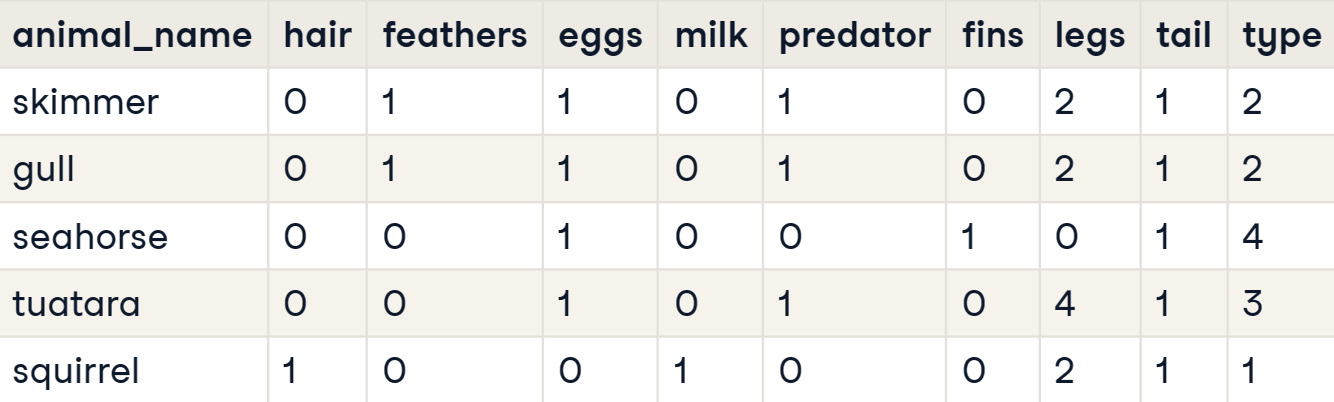

In [ ]:
import pandas as pd

# Read data from .csv file
animals = pd.read_csv("animals.csv")

In [ ]:
import numpy as np

# For features, abandon the first column, maintaining all other data
# For target, only keep the last column
# Note : if want to select certain columns from dataframe as features, use this:
#     dataframe[[col_name1, col_name2, ...]].to_numpy()
#     dataframe[one_column].to_numpy() for selecting one single column
# OR: dataframe.iloc[[row_nums*], [col_nums*]]

features = animals.iloc[:, 1:-1]
target = animals.iloc[:, -1]

# Convert to a numpy arrays
X = features.to_numpy()
y = target.to_numpy()

[Back to top](#Index)
#### 4.1.2 TensorDataset and DataLoader
torch.utils.data -> TensorDataset <br/>
torch.utils.data -> DataLoader

In [1]:
import numpy as np

# Same Dataset from  4.1.1
X = np.array([
    [0, 1, 1, 0, 1, 0, 2, 1],
    [0, 0, 1, 0, 0, 1, 0, 1],
    [0, 1, 1, 0, 1, 0, 2, 1],
    [1, 0, 0, 1, 0, 0, 2, 1],
    [0, 0, 1, 0, 1, 0, 4, 1]
])

# Each y stands for a type of animal
y = np.array([2, 2, 4, 3, 1])

In [4]:
import torch
from torch.utils.data import TensorDataset

# Initiatiate dataset class
dataset = TensorDataset(torch.tensor(X).double(), torch.tensor(y).double())

In [6]:
# Accessing an individual sample by indexing
# Each index is a tuple
sample = dataset[0]
input_sample, label_sample = sample
print(input_sample, label_sample)

tensor([0, 1, 1, 0, 1, 0, 2, 1], dtype=torch.int32) tensor(2, dtype=torch.int32)


In [7]:
from torch.utils.data import DataLoader

# Hyperparameters
batch_size = 2
shuffle = True

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

In [9]:
# Each element from DataLoader is a tuple
for batch_input, batch_labels in dataloader:
    print("batch_input : ", batch_input)
    print("batch_labels : ", batch_labels)

batch_input :  tensor([[0, 1, 1, 0, 1, 0, 2, 1],
        [1, 0, 0, 1, 0, 0, 2, 1]], dtype=torch.int32)
batch_labels :  tensor([2, 3], dtype=torch.int32)
batch_input :  tensor([[0, 0, 1, 0, 1, 0, 4, 1],
        [0, 1, 1, 0, 1, 0, 2, 1]], dtype=torch.int32)
batch_labels :  tensor([1, 4], dtype=torch.int32)
batch_input :  tensor([[0, 0, 1, 0, 0, 1, 0, 1]], dtype=torch.int32)
batch_labels :  tensor([2], dtype=torch.int32)


In [14]:
# If just want to load one batch of data, you may want to try this:
x, t = next(iter(dataloader))
print(x, t)

tensor([[0, 0, 1, 0, 1, 0, 4, 1],
        [0, 1, 1, 0, 1, 0, 2, 1]], dtype=torch.int32) tensor([1, 4], dtype=torch.int32)


[Back to top](#Index)
### 4.2 Training Loop

In [ ]:
for epoch in range(num_epochs):
    for data in dataloader:
        # 1, Set the gradient to zero
        optimizer.zero_grad()
        # 2, Get feature and target from the DataLoader
        feature, target = data
        # 3, Run a forward pass
        predict = model(feature)
        # 4, Computer loss and gradient
        loss = criterion(predict, target)
        loss.backward()
        # 5, Update parameters
        optimizer.step()

[Back to top](#Index)
### 4.3 Fine Tuning
We freeze some parameters and only train the rest parameters. <br/>
Originally, the printed name looks like "1.weight", "1.bias", or with other index n

In [16]:
import torch.nn as nn
model = nn.Sequential(
    nn.Linear(64, 128),
    nn.Linear(128, 256)
)

In [19]:
# named_parameters : return a tuple containing both name and parameter
for name, param in model.named_parameters():
    if name == "0.weight":
        # When requires_grad is set False, PyTorch would not take resource to compute these gradients.
        param.requires_grad = False

[Back to top](#Index)
### 4.4 Model Summary
torchsummary -> summary(model, input_size : Tuple) <br/>
Print a detailed hierarchy about the model selected <br/>

In [25]:
import torch
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(64, 128),
    nn.Linear(128, 256)
)

In [40]:
from torchsummary import summary

# Note 1 : Before firing summary, must make sure all parameters are on the same device.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Note 2 : While trying to summary 1 - Dimentional input, remember to write it in a form of tuple.
#          That is, using (n, ) as a form of tuple instead of (n) as an integer type
summary(model, input_size = (64, ))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]           8,320
            Linear-2                  [-1, 256]          33,024
Total params: 41,344
Trainable params: 41,344
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.16
Estimated Total Size (MB): 0.16
----------------------------------------------------------------


[Back to top](#Index)
### 4.5 Summarizing Training Loss

In [ ]:
# For training loop:
training_loss = 0.0
for i, data in enumerate(trainloader, 1):
    # >>> Run forward function
    loss = criterion(pred, label)
    # >>> Calculate Gradient
    training_loss += loss.item()
epoch_loss = training_loss / len(trainloader)

In [ ]:
# For validation loop:
validation_loss = 0.0
# Put model in validation model:
# Some functions behave differently in both modes, such as Dropout, causing a higher loss during training.

model.eval()
# Accelerate computing by not calculating gradients
with torch.no_grad():
    for i, data in enumerate(validationloader, 1):
    # >>> Run forward function
    loss = criterion(pred, label)
    # >>> Calculate Gradient
    validation_loss += loss.item()
epoch_loss = validation_loss / len(validationloader)

# Note : Do not forget to switch to model.train() after validating!
model.train()

[Back to top](#Index)
### 4.6 Torchmetrics
Torchmetrics is used to calculate accuracy.

In [ ]:
import torchmetrics

metric = torchmetrics.Accuracy(task="multiclass", num_classes=3)

for i, data in enumerate(dataloader, 0):
    features, labels = data
    output = model(features)

    # Calculate accuracy based on batch
    # If input is one-hot encoding, use .argmax() to return to class number
    acc = metric(output, labels.argmax(dim=-1))

acc = metric.compute()
print(f"Accuracy on all data: {acc}")

# Reset metric for next epoch
metric.reset()

[Back to top](#Index)
### 4.7 Overfitting

[Back to top](#Index)
#### 4.7.1 Dropout
torch.nn -> Dropout(p), where p indicates the probability of setting a neuron to zero <br/>
Must switch mode between train() and eval() situations! <br/>

In [19]:
import torch
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(8, 4),
    nn.ReLU(),
    nn.Dropout(p=0.5)
)

Parameter containing:
tensor([[-0.2387,  0.0719,  0.0983,  0.0758,  0.2631,  0.2073,  0.1288,  0.0417],
        [-0.2321, -0.0076,  0.2673, -0.1332,  0.3446,  0.1427, -0.1750,  0.1758],
        [ 0.2266,  0.1328, -0.3435,  0.0184,  0.2335, -0.2809,  0.0284,  0.2317],
        [-0.3336,  0.2019,  0.2902, -0.1664, -0.3072, -0.1662,  0.3078,  0.1184]],
       requires_grad=True)

In [20]:
features = torch.randn((1, 8))
output = model(features)
print(output) # You may see some zeros in the output

tensor([[1.0161, 0.3975, 0.0000, 0.0000]], grad_fn=<MulBackward0>)


[Back to top](#Index)
#### 4.7.2 Weight Decay
Operate arguments within optimizers

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Linear(6, 3)
optimizer = optim.SGD(model.parameters(), lr=1e-3, weight_decay=1e-4)

[Back to top](#Index)
#### 4.7.3 Data Augmentation

[Back to top](#Index)
### 4.8 General Recipe for training
1, Overfitting one single datapoint <br/>
2, Dealing with overfitting <br/>
3, Fine-tuning hyperparameters (using grid search or random search) <br/>

In [ ]:
# Code for Overfitting one single datapoint
features, labels = next(iter(trainloader))
for i in range(1e3):
    optimizer.zero_grad()
    outputs = model(features)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

In [ ]:
# Grid search:
for factor in range(2, 6):
    lr = 10 ** -factor

# Random search:
import numpy as np
factor = np.random.uniform(2, 6)
lr = 10 ** -factor

[Back to top](#Index)
### 4.9 Initialization

In [1]:
import torch.nn.init as init
import torch.nn as nn

layer = nn.Linear(6, 3)
init.kaiming_uniform_(layer.weight)
print(layer.weight)

Parameter containing:
tensor([[ 0.3073, -0.0925,  0.9857,  0.7562,  0.2057, -0.7754],
        [ 0.5230, -0.9721,  0.1838, -0.5425,  0.3205, -0.4688],
        [-0.2986, -0.7612, -0.2281,  0.1667, -0.1656, -0.2899]],
       requires_grad=True)


[Back to top](#Index)
### 4.10 Normalization

In [2]:
import torch.nn.init as init
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(9, 16),
    nn.BatchNorm1d(16)
)

[Back to top](#Index)

## 5. Objected Oriented Programming

[Back to top](#Index)

### 5.1 Dataset
torch.utils -> data -> Dataset <br/>
torch.utils -> data -> DataLoader <br/>

In [ ]:
from torch.utils.data import Dataset
import pandas as pd

class WaterDataset(Dataset):
    def __init__(self, csv_path):
        # Make sure our WaterDataset behaves like Dataset in PyTorch framework
        super().__init__()
        df = pd.read_csv(csv_path)
        self.data = df.to_numpy()

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        features = self.data[idx, :-1]
        label = self.data[idx, -1]
        return features, label

In [ ]:
# Generate Customized Dataset
dataset_train = WaterDataset("water_train.csv")

In [ ]:
# Create DataLoader
from torch.utils.data import DataLoader

dataloader_train = DataLoader(
    dataset_train,
    batch_size=2,
    shuffle=True
)

In [ ]:
# Generate the data from the next iteration batch
features, labels = next(iter(dataloader_train))
print(features, labels)

[Back to top](#Index)

### 5.2 Model

In [ ]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init_()
        self.fc1 = nn.Linear(9, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.sigmoid(self.fc3(x))
        return x

In [ ]:
# Initiate an instance
net = Net()

[Back to top](#Index)

## Conclusion


[Back to top](#Index
)
## References

https://www.datacamp.com